# LRP

In [1]:

from PIL import Image
import matplotlib.pyplot as plt

from torchvision import models, transforms
from torch.nn import functional as F
from torch import nn
from torch import topk
import torch

from matplotlib.colors import ListedColormap

import numpy as np
import json
import utils

## Load model and the labels 
the VGG16 model is used

In [2]:
model = models.vgg16(pretrained=True); model.eval()
layers = list(model._modules['features']) + [model._modules['avgpool']] + \
    utils.toconv(list(model._modules['classifier']))
L = len(layers)

C:\Users\Baumann\anaconda3\envs\cp2\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Baumann\anaconda3\envs\cp2\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Linear(in_features=25088, out_features=4096, bias=True)
ReLU(inplace=True)
Dropout(p=0.5, inplace=False)
Linear(in_features=4096, out_features=4096, bias=True)
torch.Size([4096, 4096])
ReLU(inplace=True)
Dropout(p=0.5, inplace=False)
Linear(in_features=4096, out_features=1000, bias=True)
torch.Size([1000, 4096])


In [3]:
with open('label.json', 'r') as f:
  lbl = json.loads(f.read())

## Load Images

RGB image of size (683, 683)


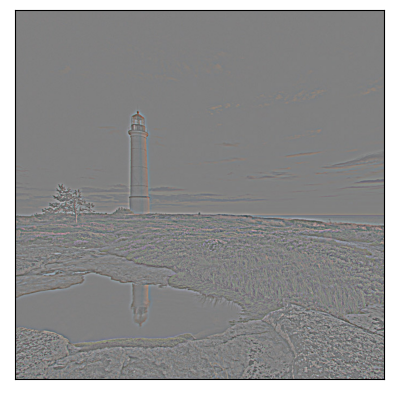

In [4]:
from urllib.request import urlopen
from urllib.error import URLError
import matplotlib.pyplot as plt

image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Felis_catus-cat_on_snow.jpg/640px-Felis_catus-cat_on_snow.jpg'

lighthouse_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse_original.jpg?raw=true'
lighthouse_90deg_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse_90deg.jpg?raw=true'
lighthouse_blur_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse_blur.jpg?raw=true'
lighthouse_highpass_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse_highpass.jpg?raw=true'
lighthouse_mix_channel_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse_mix_channel.jpg?raw=true'
lighthouse_noise_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse_noise.jpg?raw=true'
lighthouse_equalized_url = 'https://github.com/Falk0/latex_master1_semester2/blob/main/deep_learning_for_image_analysis/figures/assignment_4/lighthouse%20equalized.jpg?raw=true'

lighthouse_url_list = [
    lighthouse_url,
    lighthouse_90deg_url,
    lighthouse_blur_url,
    lighthouse_highpass_url,
    lighthouse_mix_channel_url,
    lighthouse_noise_url,
    lighthouse_equalized_url   
]

description = ['Original', '90deg', 'Gaussian blur', 'Highpass filtered', 'Mixed color channels', 'Noise', 'Hist.equalized']

lighthouse_image_list = []
for i in range(len(lighthouse_url_list)):
    
    try:
        with Image.open(urlopen(lighthouse_url_list[i])) as im:
            # The following fixes some problems when loading images:
            # https://stackoverflow.com/a/64598016
            lighthouse_image_list.append(im.convert("RGB"))
    except (URLError, OSError):
        print("please provide a valid URL or local path")


 
print(f"{lighthouse_image_list[3].mode} image of size {lighthouse_image_list[3].size}")
plt.imshow(np.asarray(lighthouse_image_list[3]))
plt.xticks([])
plt.yticks([])
plt.show()

In [5]:
sandal_url = "https://raw.githubusercontent.com/Okrash0/Explainable-Artificial-Intelligence/main/fig/sandal.jpg"
toilet_url = "https://raw.githubusercontent.com/Okrash0/Explainable-Artificial-Intelligence/main/fig/toilet.jpg"
image_url_list = [sandal_url, toilet_url]

images = []
images.append(Image.open("fig/cat_1.jpg"))
images.append(Image.open("fig/cat_car_0.jpg"))
images.append(Image.open("fig/truck_0.jpg"))
for i in range(len(image_url_list)):
    
    try:
        with Image.open(urlopen(image_url_list[i])) as im:
            # The following fixes some problems when loading images:
            # https://stackoverflow.com/a/64598016
            images.append(im.convert("RGB"))
    except (URLError, OSError):
        print("please provide a valid URL or local path")

        

images.append(lighthouse_image_list[0])
 
image_name = ["cat", "car", "truck", "sandal", "toilet", "lighthouse"]
figures = ['original', 'gaussian noise', 'salt and peppar', 'flipped']


## Do Stuff

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


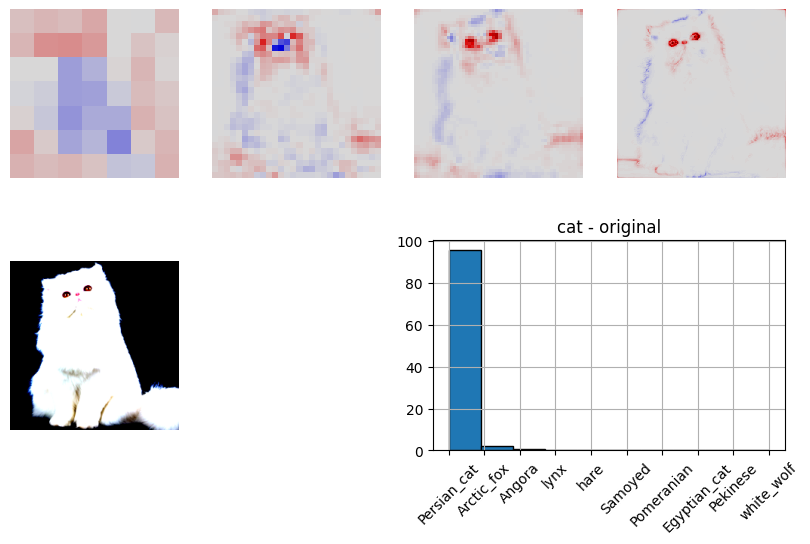

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


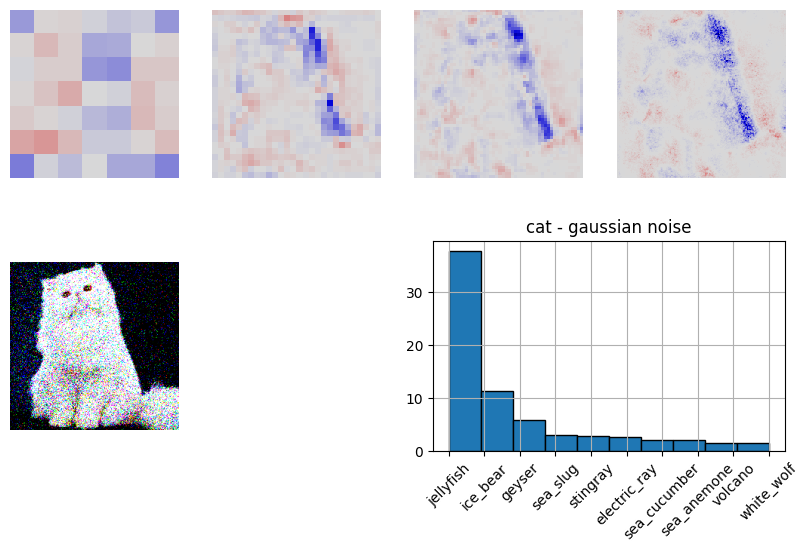

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


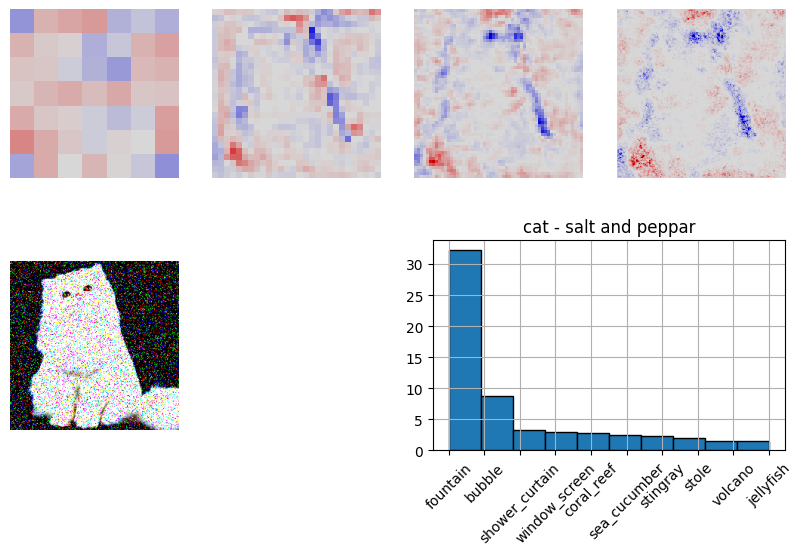

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


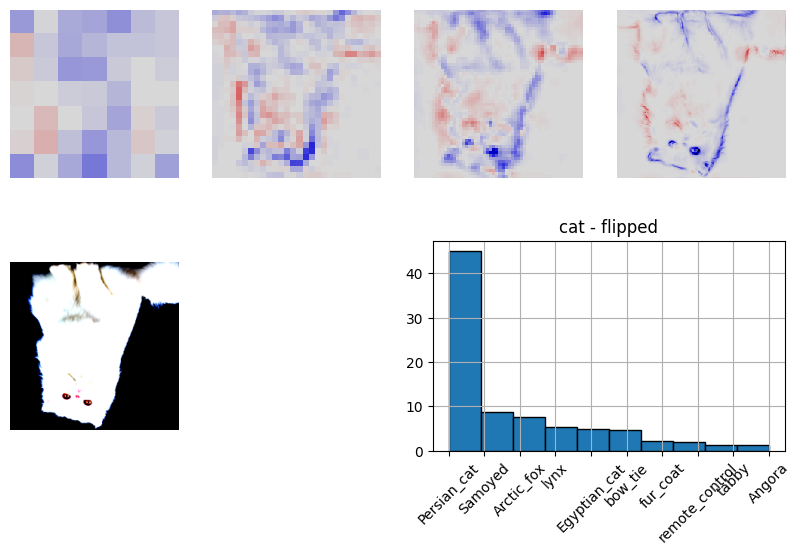

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


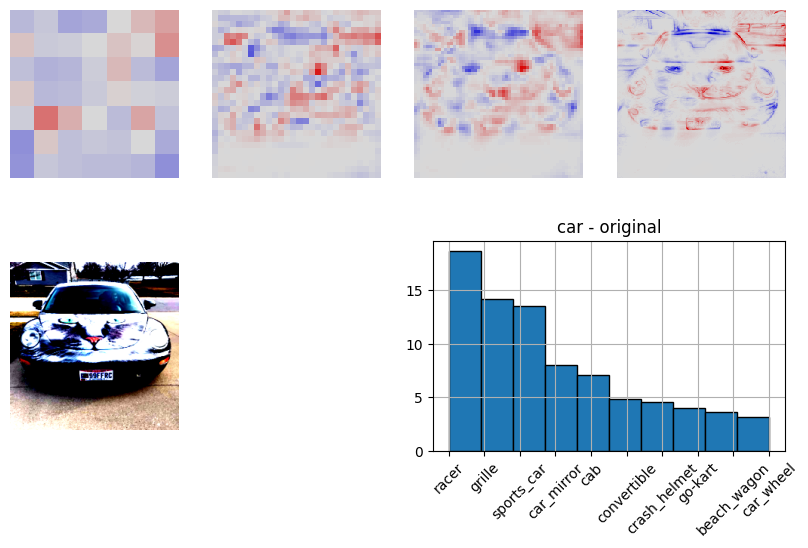

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


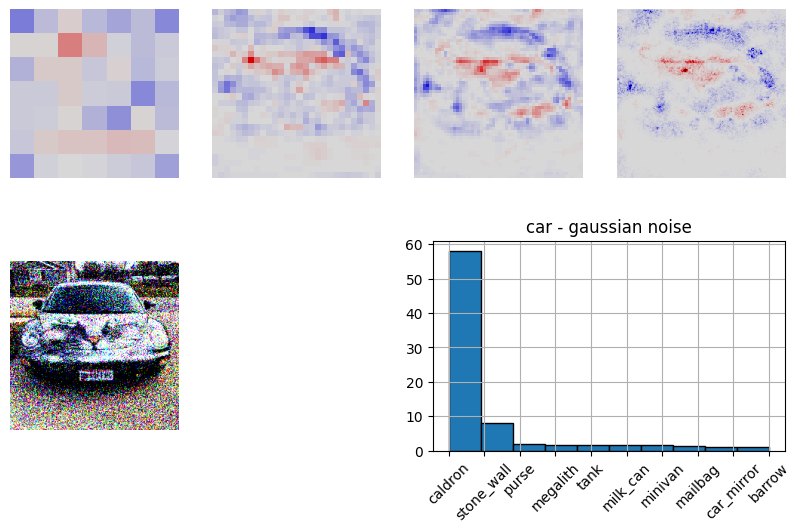

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


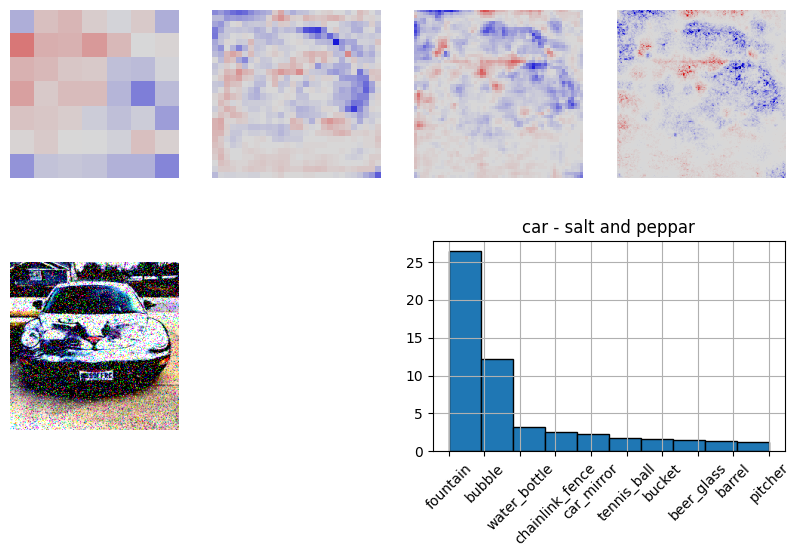

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


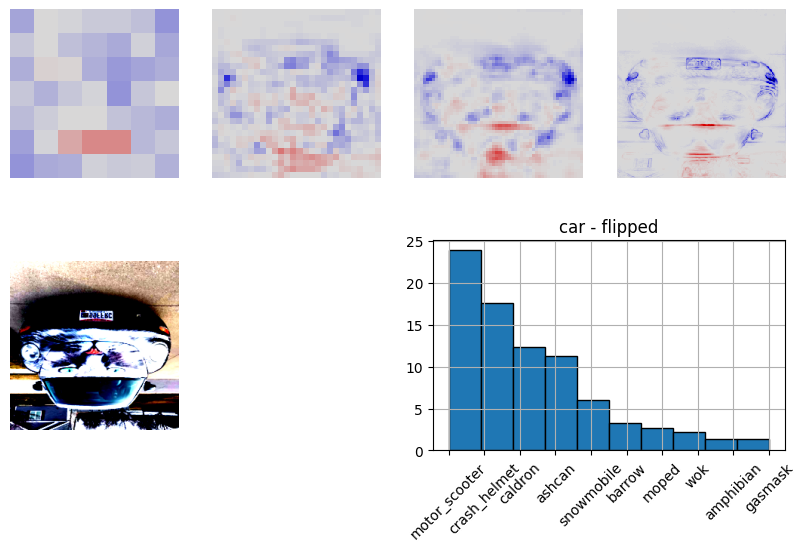

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


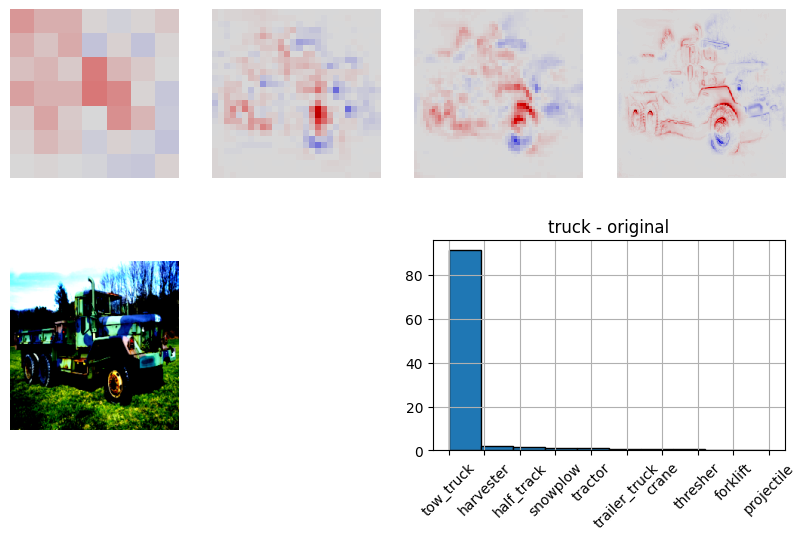

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


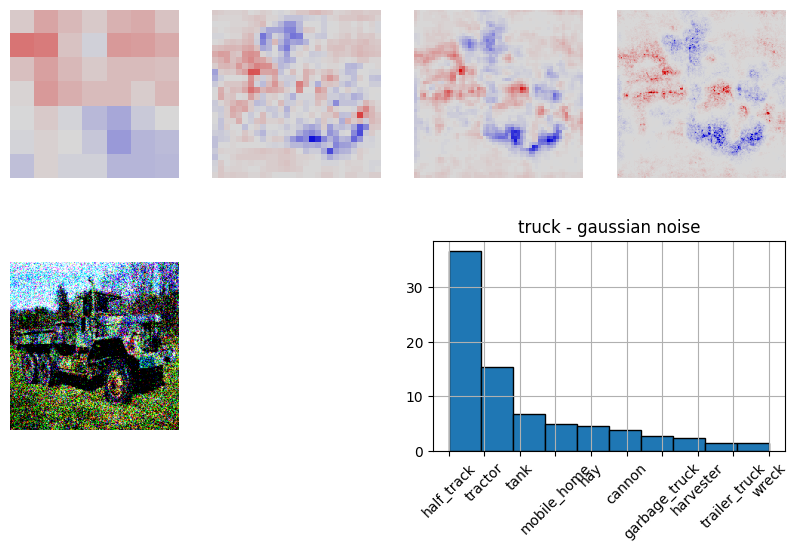

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


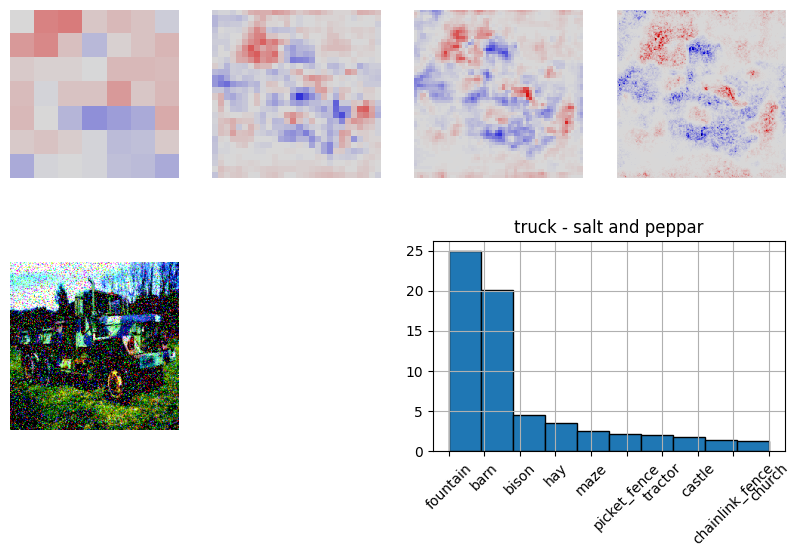

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


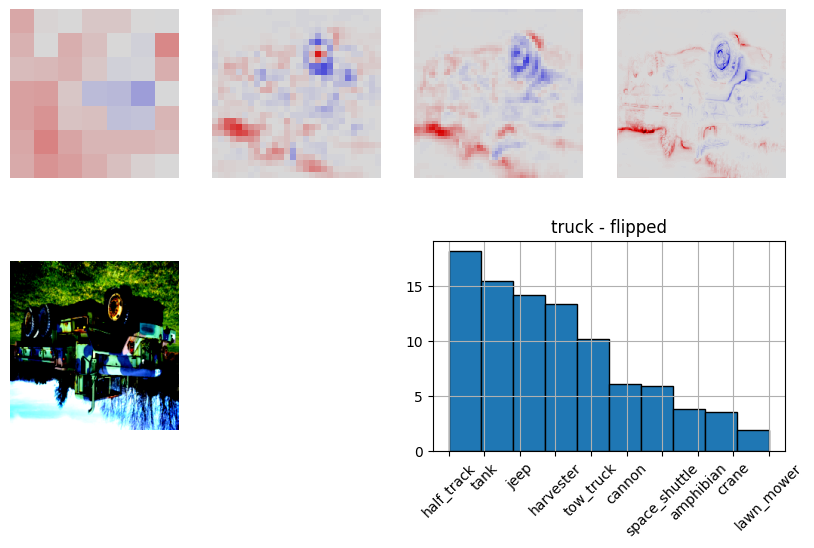

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


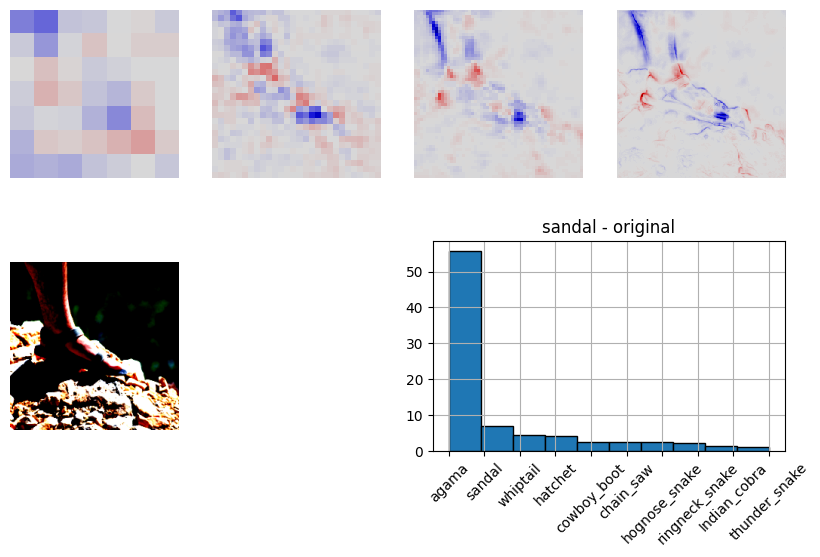

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


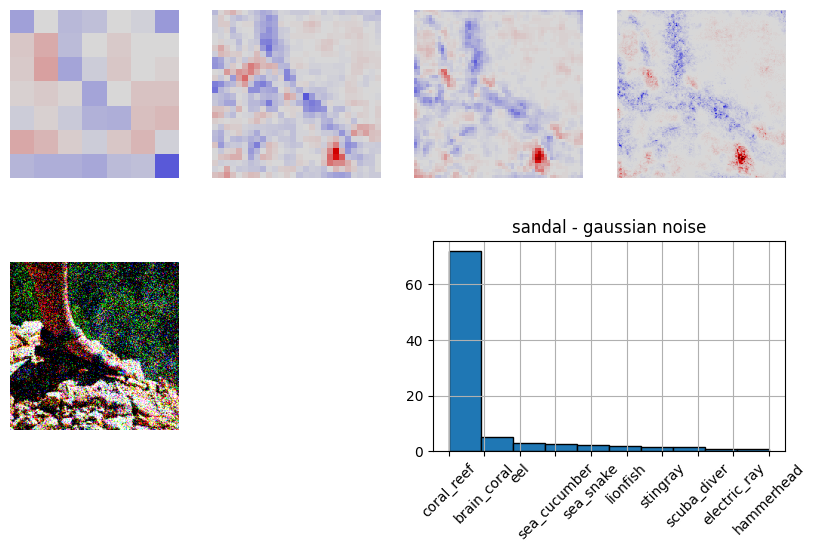

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


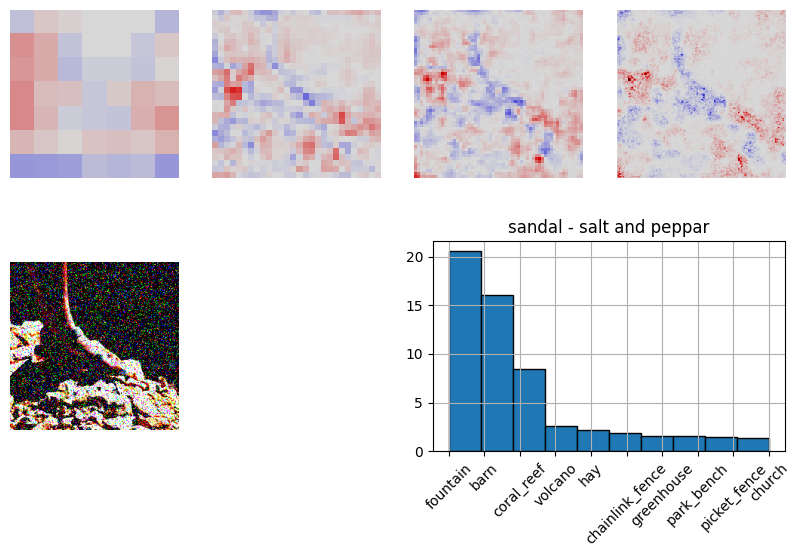

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


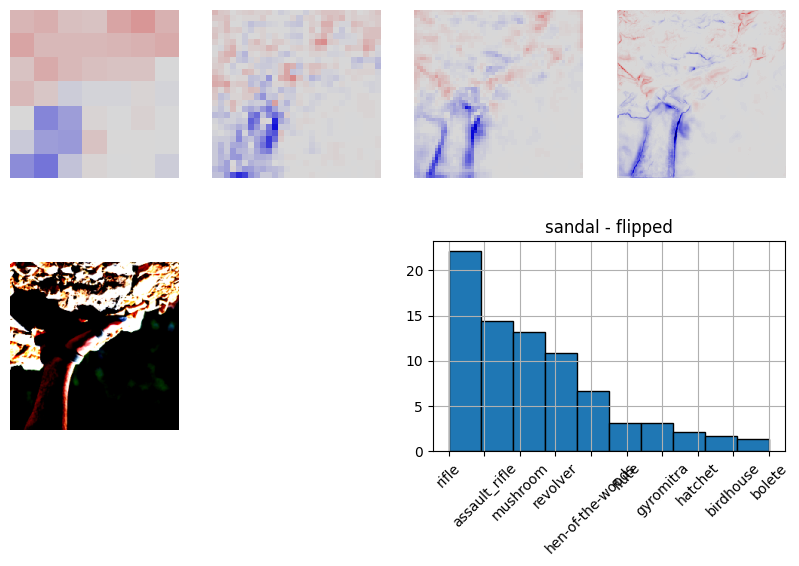

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


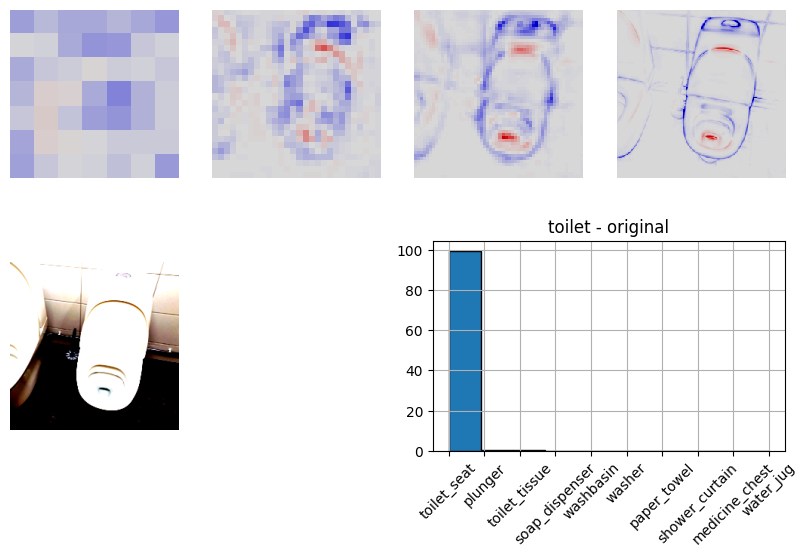

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


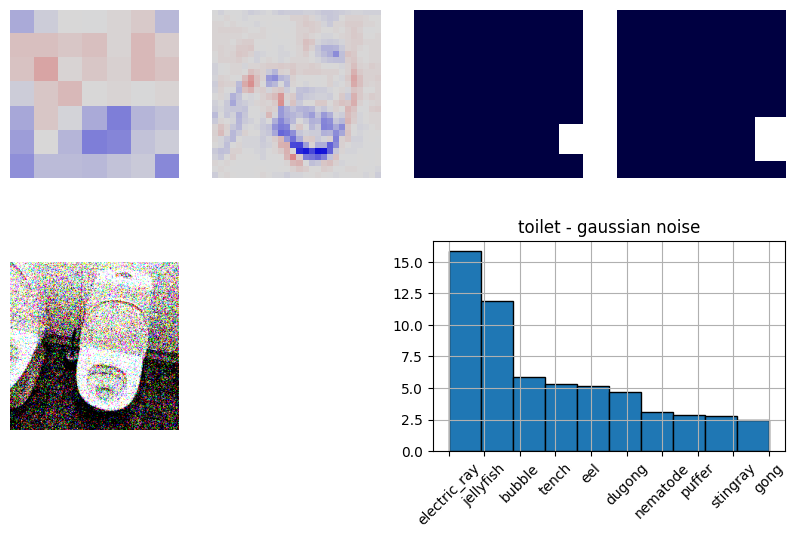

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


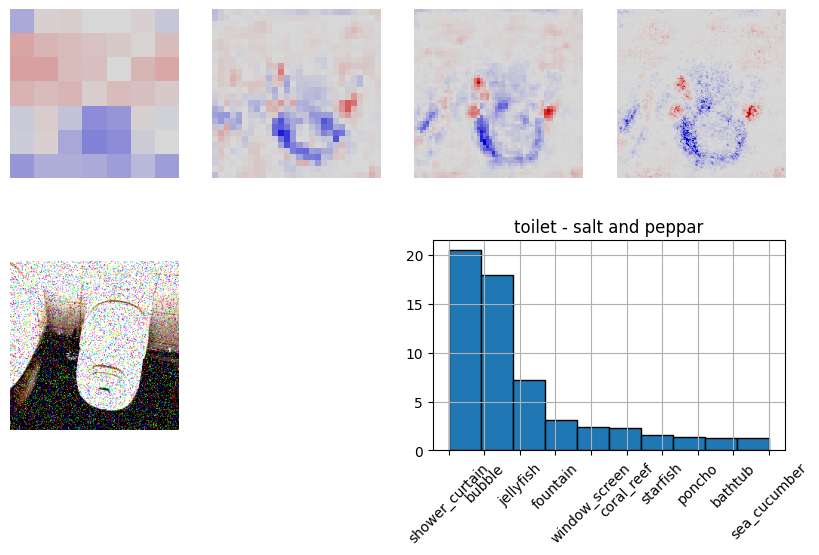

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


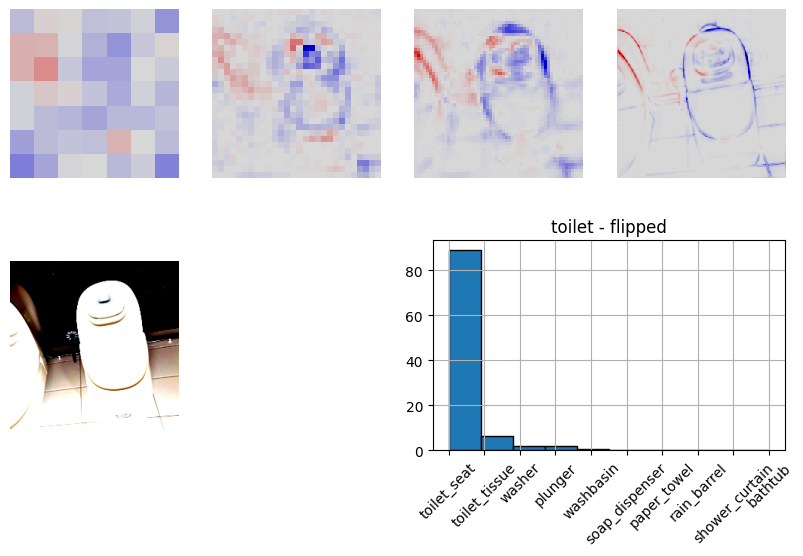

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


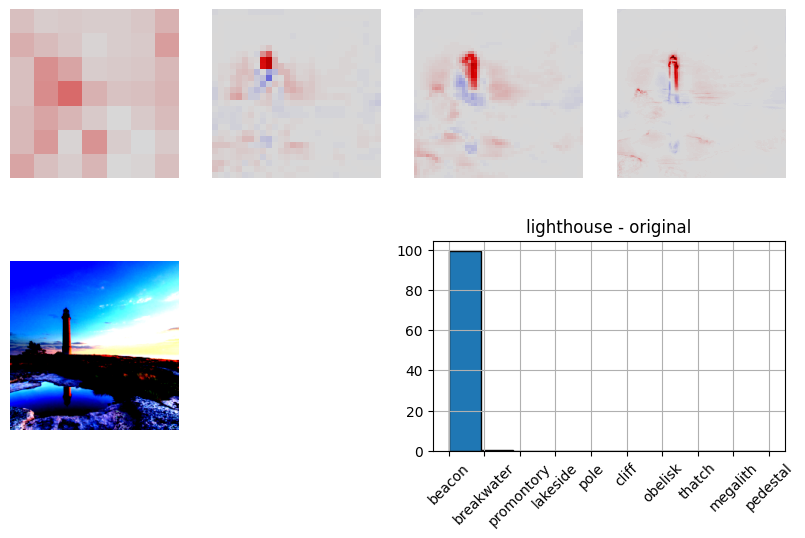

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


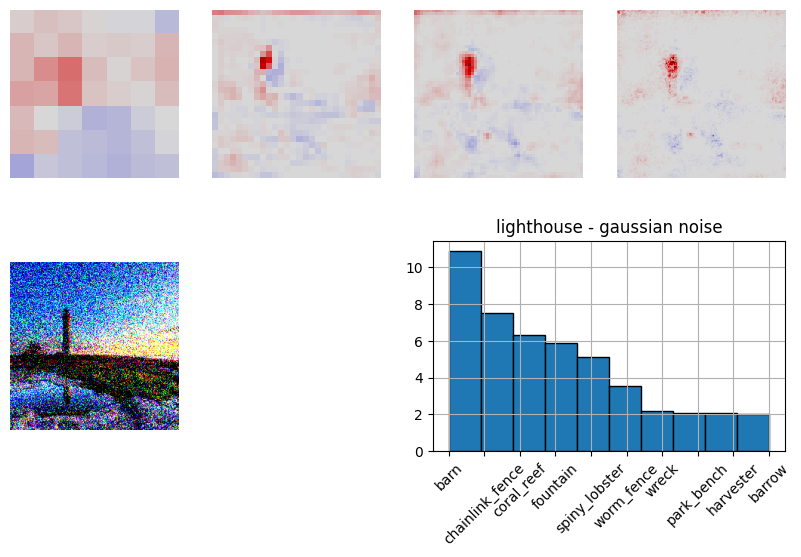

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


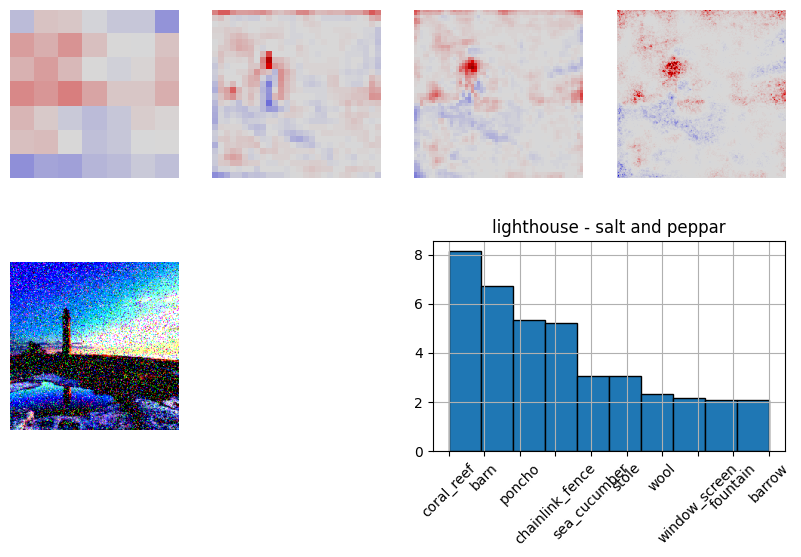

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_23012\81867504.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred_probabilities = F.softmax(prediction).data.squeeze()


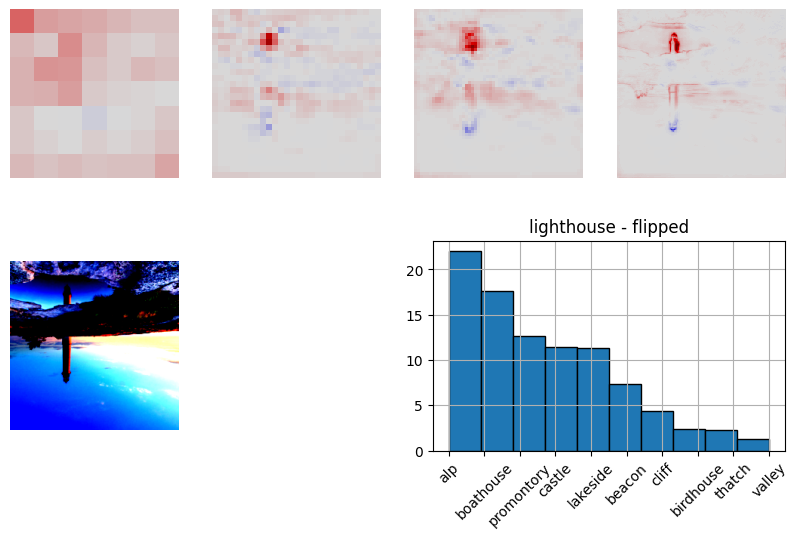

In [6]:
for image_index, image in enumerate(images):
    
    # Imagenet mean/std
    
    normalize = transforms.Normalize(
       mean=[0.485, 0.456, 0.406],
       std=[0.229, 0.224, 0.225]
    )
    
    # Preprocessing - scale to 224x224 for model, convert to tensor, 
    # and normalize to -1..1 with mean/std for ImageNet
    preprocess = transforms.Compose([
       transforms.Resize((224,224)),
       transforms.ToTensor(),
       normalize
    ])
    
    display_transform = transforms.Compose([transforms.Resize((224,224))])
    
    tensor_original = preprocess(image)
    
    new_tensors = []
    new_tensors.append(tensor_original)
    new_tensors.append(utils.noise(tensor_original, 'gauss'))
    new_tensors.append(utils.noise(tensor_original, 'sp'))
    new_tensors.append(utils.noise(tensor_original, 'flip'))
    
    #%
    for index, X in enumerate(new_tensors):
        
        plt.figure(figsize=(10, 6))
        ax = []
        ax.append(plt.subplot(2,4,5))
        ax.extend([plt.subplot(2,4,i+1) for i in range(4)])
        #ax.extend([plt.subplot(2,3,i+1) for i in range(3)])
        
        ax.append(plt.subplot(2,2,4))
        
        X = X.reshape((1,3,224,224))
        ax[0].imshow(np.transpose(X.numpy(), (0, 2, 3, 1)).reshape(224,224,3))
        ax[0].axis('off')
        #plt.show()
        
        
        A = [X]+[None]*L
        for l in range(L):
            #(l, ' :  ', layers[l])
            A[l+1] = layers[l].forward(A[l])

        #scores = np.array(A[-1].data.view(-1))
        #scores = F.softmax(A[-1].data.view(-1)).data.squeeze().numpy() * 100
        #ind = np.argsort(-scores)
        #for i in ind[:10]:
        #    print('%20s (%3d): %6.3f'%(lbl[str(i)][1][:20],i,scores[i]))

        T = torch.FloatTensor((1.0*(np.arange(1000)==483).reshape([1,1000,1,1])))

        R = [None]*L + [(A[-1]*T).data]

        for l in range(1,L)[::-1]:
            #print('l: ', l)
            A[l] = (A[l].data).requires_grad_(True)
        
            if isinstance(layers[l],torch.nn.MaxPool2d): 
                layers[l] = torch.nn.AvgPool2d(2)
        
            if isinstance(layers[l],torch.nn.Conv2d) or isinstance(layers[l],torch.nn.AvgPool2d):
        
                if l <= 16:       
                    rho = lambda p: p + 0.25*p.clamp(min=0)
                    incr = lambda z: z+1e-9
                if 17 <= l <= 30: 
                    rho = lambda p: p
                    incr = lambda z: z+1e-9+0.25*((z**2).mean()**.5).data
                if l >= 31:       
                    rho = lambda p: p
                    incr = lambda z: z+1e-9
        
                z = incr(utils.newlayer(layers[l],rho).forward(A[l]))  # step 1
               # print(R[l+1].shape)
                #print(z.shape)
                s = (R[l+1]/z).data                                    # step 2
                (z*s).sum().backward()
                c = A[l].grad                                          # step 3
                R[l] = (A[l]*c).data                                   # step 4
                
            else:
                
                R[l] = R[l+1]

        for i,l in enumerate([32,21,11,1]):
            R0 = np.array(R[l][0]).sum(axis=0)
            sx = 0.5*i+1.5
            sy =  0.5*i+1.5
            b = 10*((np.abs(R0)**3.0).mean()**(1.0/3))

            
            my_cmap = plt.cm.seismic(np.arange(plt.cm.seismic.N))
            my_cmap[:,0:3] *= 0.85
            my_cmap = ListedColormap(my_cmap)
            #.figure(figsize=(sx,sy))
            #ax[1].subplots_adjust(left=0,right=1,bottom=0,top=1)
            ax[1+i].axis('off')
            ax[1+i].imshow(R0,cmap=my_cmap,vmin=-b,vmax=b,interpolation='nearest')
            #ax[1].colorbar()
            #plt.show()

        
        
        
        #%
        tensor = X.reshape(3, 224, 224)
        
        prediction = model(X)
        pred_probabilities = F.softmax(prediction).data.squeeze()
        
        
        #imshow(np.transpose(tensor.numpy(), (1, 2, 0)))
        #plt.title(image_name[image_index] + ' - ' + figures[index])
        #plt.show()
        
        class_pred = topk(pred_probabilities,10)
        class_idx = class_pred[1].int()
        class_val = class_pred[0]
        weights = class_val.detach().numpy() * 100
        idx = [lbl[str(i)][1] for i in class_idx.numpy()]
        ax[-1].hist(idx, weights=weights, ec='k')
        ax[-1].grid()
        plt.xticks(rotation=45)
        plt.title(image_name[image_index] + ' - ' + figures[index])
        plt.show()